In [60]:
#Importing our Packages
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression , Ridge , Lasso
from sklearn.metrics import mean_absolute_percentage_error as mape
from sklearn.metrics import mean_squared_error as rmse
import seaborn as sns

from sklearn.dummy import DummyRegressor
from sklearn.preprocessing import OneHotEncoder

from sklearn.ensemble import RandomForestRegressor

from sklearn.metrics import r2_score

import xgboost as xgb
from xgboost.sklearn import XGBRegressor


In [59]:
#!pip install xgboost

In [2]:
#Load Libraries and Create engine Connection

import pymysql
import pandas as pd
import numpy as np
import sqlalchemy
import gc
engine =sqlalchemy.create_engine(
        sqlalchemy.engine.url.URL.create(
        drivername="mysql+pymysql",
        username='Estimators',  # e.g. "my-database-user"
        password='Estimator2021',  # e.g. "my-database-password"
        host='34.77.88.127',  # e.g. "127.0.0.1"
        port=3306,  # e.g. 3306
        database='Housing_France',  # e.g. "my-database-name"
    ))

conn = engine.connect().execution_options(stream_results=True)

In [3]:
#Load Libraries and Create engine Connection

import pymysql
import pandas as pd
import numpy as np
import sqlalchemy
import gc

def get_data(querystring,chunk):
    engine =sqlalchemy.create_engine(
    sqlalchemy.engine.url.URL.create(
    drivername="mysql+pymysql",
    username='Estimators',  # e.g. "my-database-user"
    password='Estimator2021',  # e.g. "my-database-password"
    host='34.77.88.127',  # e.g. "127.0.0.1"
    port=3306,  # e.g. 3306
    database='Housing_France',  # e.g. "my-database-name"
    ))
    conn = engine.connect().execution_options(stream_results=True)
    frame = pd.DataFrame()
    for chunk_dataframe in pd.read_sql(
            querystring, conn, chunksize=chunk):
            print(f"Got dataframe w/{len(chunk_dataframe)} rows")
            frame= frame.append(chunk_dataframe)
            # ... do something with dataframe ...
            
    return frame

In [4]:
#Template for getting some data
df = get_data("""select * from data_working_update WHERE nom_commune IN 
('Paris 9e Arrondissement','Paris 8e Arrondissement',
 'Paris 7e Arrondissement','Paris 6e Arrondissement',
 'Paris 5e Arrondissement', 'Paris 4e Arrondissement',
 'Paris 3e Arrondissement','Paris 2e Arrondissement',
 'Paris 20e Arrondissement', 'Paris 1er Arrondissement',
 'Paris 19e Arrondissement','Paris 18e Arrondissement',
 'Paris 17e Arrondissement',
 'Paris 16e Arrondissement', 'Paris 15e Arrondissement',
 'Paris 14e Arrondissement','Paris 13e Arrondissement',
 'Paris 12e Arrondissement', 'Paris 11e Arrondissement',
 'Paris 10e Arrondissement', 
 'Nice',
 'Marseille 9e Arrondissement','Marseille 8e Arrondissement', 'Marseille 7e Arrondissement',
 'Marseille 6e Arrondissement', 'Marseille 5e Arrondissement', 'Marseille 4e Arrondissement',
 'Marseille 3e Arrondissement', 'Marseille 2e Arrondissement','Marseille 1er Arrondissement',
 'Marseille 16e Arrondissement','Marseille 15e Arrondissement','Marseille 14e Arrondissement',
 'Marseille 13e Arrondissement', 'Marseille 12e Arrondissement','Marseille 11e Arrondissement',
 'Marseille 10e Arrondissement') """, 1000)

Got dataframe w/1000 rows
Got dataframe w/1000 rows
Got dataframe w/1000 rows
Got dataframe w/1000 rows
Got dataframe w/1000 rows
Got dataframe w/1000 rows
Got dataframe w/1000 rows
Got dataframe w/1000 rows
Got dataframe w/1000 rows
Got dataframe w/1000 rows
Got dataframe w/1000 rows
Got dataframe w/1000 rows
Got dataframe w/1000 rows
Got dataframe w/1000 rows
Got dataframe w/1000 rows
Got dataframe w/1000 rows
Got dataframe w/1000 rows
Got dataframe w/1000 rows
Got dataframe w/1000 rows
Got dataframe w/1000 rows
Got dataframe w/1000 rows
Got dataframe w/1000 rows
Got dataframe w/1000 rows
Got dataframe w/1000 rows
Got dataframe w/1000 rows
Got dataframe w/1000 rows
Got dataframe w/1000 rows
Got dataframe w/1000 rows
Got dataframe w/1000 rows
Got dataframe w/1000 rows
Got dataframe w/1000 rows
Got dataframe w/1000 rows
Got dataframe w/1000 rows
Got dataframe w/1000 rows
Got dataframe w/1000 rows
Got dataframe w/1000 rows
Got dataframe w/1000 rows
Got dataframe w/1000 rows
Got datafram

In [5]:
data = df.copy()
data.columns

Index(['id_mutation', 'date_mutation', 'nature_mutation', 'valeur_fonciere',
       'adresse_nom_voie', 'adresse_code_voie', 'code_postal', 'code_commune',
       'nom_commune', 'code_departement', 'id_parcelle', 'type_local',
       'surface_reelle_bati', 'nombre_pieces_principales', 'surface_terrain',
       'longitude', 'latitude'],
      dtype='object')

In [6]:
data.shape

(292510, 17)

# Drop duplicates

## id_mutation

In [8]:
def drop_duplicates(df, col_name):
    return df.drop_duplicates(subset=[col_name])

data = drop_duplicates(df=data, col_name = 'id_mutation')
data.shape

(263337, 17)

In [9]:
df2 = data.copy()
df2.shape

(263337, 17)

# Filter data, Removing outliers

In [10]:
df2=df2[
    (df2['valeur_fonciere'] < 5_000_000) & (df2['valeur_fonciere'] > 10_000)]
df2.shape

(262238, 17)

In [11]:
df2=df2[
    (df2['nombre_pieces_principales'] < 8) & (df2['nombre_pieces_principales'] > 0)]
df2.shape

(260835, 17)

## Scatterplots

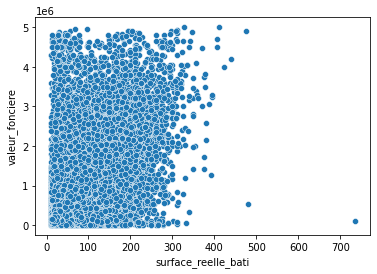

In [12]:
sns.scatterplot(x=df2['surface_reelle_bati'], y=df2['valeur_fonciere']);

In [13]:
df2=df2[
    (df2['surface_reelle_bati'] < 250) & (df2['valeur_fonciere'] > 10)]
df2.shape

(260338, 17)

In [14]:
df2 = df2.drop(columns = 'nature_mutation')
df2.shape

(260338, 16)

In [15]:
df2.head()

,id_mutation,date_mutation,valeur_fonciere,adresse_nom_voie,adresse_code_voie,code_postal,code_commune,nom_commune,code_departement,id_parcelle,type_local,surface_reelle_bati,nombre_pieces_principales,surface_terrain,longitude,latitude
0,2016-36031,2016-01-05,129000,RUE DU CHATEAU,1335,6300,6088,Nice,6,06088000KR0130,Appartement,38,1,0,7.277516,43.696437
1,2016-36032,2016-01-07,154000,AV DES ARENES DE CIMIEZ,0325,6000,6088,Nice,6,06088000LE0233,Appartement,38,2,0,7.279226,43.705106
2,2016-36035,2016-01-06,134000,AV RENE BOYLESVE,5420,6100,6088,Nice,6,06088000EB0093,Appartement,48,2,0,7.255168,43.717018
4,2016-36036,2016-01-08,137000,BD ARMEE DES ALPES,0360,6300,6088,Nice,6,06088000IV0440,Appartement,40,2,0,7.293505,43.708142
5,2016-36037,2016-01-08,395000,AV BROWN SEQUART,0970,6000,6088,Nice,6,06088000LR0184,Appartement,79,3,0,7.273418,43.709786


In [16]:
df2.isnull().sum()

id_mutation                  0
date_mutation                0
valeur_fonciere              0
adresse_nom_voie             0
adresse_code_voie            0
code_postal                  0
code_commune                 0
nom_commune                  0
code_departement             0
id_parcelle                  0
type_local                   0
surface_reelle_bati          0
nombre_pieces_principales    0
surface_terrain              0
longitude                    0
latitude                     0
dtype: int64

In [17]:
len(df2['code_postal'].unique())

41

In [18]:
len(df2['code_commune'].unique())

37

In [19]:
#Change code_postal to str df2['code_postal'].dtype
df2['code_postal'] = df2['code_postal'].astype(str)

# Function encoding_categ_column

In [20]:
def encoding_categ_column(df, col_name):
    
    L = list(df[col_name].unique())
    if '' in L:
        df[col_name].replace("", "NoValue", inplace=True) #Replace NaN by "NoCodeNature"
    
    ohe = OneHotEncoder(sparse = False) # Instanciate encoder
    ohe.fit(df[[col_name]]) # Fit encoder  ---> OneHotEncoder(sparse=False)
    
    col_encoded = ohe.transform(df[[col_name]]) # Encode

    dicts_col = {}
    keys = list(ohe.categories_[0])
    values = col_encoded.T.astype(int)
    
    for i,j in enumerate(keys):
        dicts_col[j] = values[i,:]

    result = pd.DataFrame.from_dict(dicts_col)
    
    df = df.reset_index(drop=True)
    
    #Concat df and result dataframes
    data_res = pd.concat([df, result], axis = 1)
    
    if 'NoValue' in list(data_res.columns):
        data_res = data_res.drop(columns= ['NoValue',col_name] )
    else:
        data_res = data_res.drop(columns= col_name)
        
    return data_res   

## code_postal

In [21]:
data_t = encoding_categ_column(df = df2, col_name = 'code_postal')
data_t.shape

(260338, 56)

In [22]:
L1 = len(df2['code_postal'].unique()) + df2.shape[1] - 1
L2 = data_t.shape[1]
assert(L1 == L2)

In [23]:
data_t2 = data_t# I add this line because this column does not exist in the updated DB 

## type_local 

In [25]:
data_t3 = encoding_categ_column(df = data_t2, col_name = 'type_local')
data_t3.shape

(260338, 57)

In [26]:
L1 = len(data_t2['type_local'].unique()) + data_t2.shape[1] - 1
L2 = data_t3.shape[1]
assert(L1 == L2)

In [27]:
data_t4 = data_t3

# Starting analysis

In [28]:
df_new = data_t4.copy()

# Relevant features

## Random Forest

### Defining a function to print out the results of the Random forest and Linear regression models

In [38]:
def apply_linRegression_randomforest_model(df, col_list, target_var ,model):
        
    #by default, col_list = cols_removd_target
    #target_var = 'valeur_fonciere'
        
    # define dataset
    y = df[target_var]
    X = df[col_list]
    
    
    #instantiating train test split while creating my X and y train and test variables
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

    #instantiating the standard scaler and setting it equal to ss
    #scaling my Xs
    scaler = StandardScaler()
    scaler.fit(X_train)
    X_train_sc = scaler.transform(X_train)
    X_test_sc = scaler.transform(X_test)

    # define model
    if model == "LinearRegression":
        la= Lasso()
        ri = Ridge()
        lr = LinearRegression()
        models = [la,ri,lr]
        
        for model in models:
            fitter = model.fit(X_train_sc,y_train)
            print(f"{model} R2 score is: {np.round(model.score(X_test_sc, y_test),3)})")
            print(f"{model} rmse score is: {np.round(rmse(model.predict(X_test_sc),y_test),3)})")
            print(f"{model} mape score is: {np.round(mape(model.predict(X_test_sc),y_test),3)}"  )
            print(11*"** **")
            
    if model == "RandomForest":    
        random_forest = RandomForestRegressor(n_estimators = 1000, random_state = 42)
        #Fitting the Random Forest model
        random_forest.fit(X_train_sc,y_train)

        # Use the model on the testing data to predict the results
        y_pred = random_forest.predict(X_test_sc)
        
        # Print the R2 score 
        print ("R2 score:\n") 
        print (('{:.2f}'.format((100*(r2_score(y_test, y_pred))))) + " %")
        
        # Print the mean squared error
        print ("Mean-squared error:\n")
        print(rmse(y_test, y_pred))

        # Print the mean absolute error
        print ("Mean-absolute error:\n")
        print(mape(y_test, y_pred))


        feature_importances = pd.DataFrame(random_forest.feature_importances_,
                                       index = X_train.columns,
                                       columns=['importance']).sort_values('importance', ascending=False)

        print(feature_importances)
        return feature_importances

### Features importance of the Random Forest model

In [39]:
# Define dataset parameters
df_new = data_t4.copy()
cols = list(df_new.columns)

columns_todrop = ['id_mutation', 'date_mutation',
         'adresse_nom_voie', 'adresse_code_voie',
 'nom_commune', 'code_commune', 
 'code_departement',
 'id_parcelle', '0', 'Appartement'
 ]

for i in columns_todrop:
    cols.remove(i)
    
cols_removd_target = cols[:]
cols_removd_target.remove('valeur_fonciere')

data_v2 = df_new[cols]

feature_importances = apply_linRegression_randomforest_model(df = data_v2, 
                                                             col_list = cols_removd_target,
                                                             target_var = "valeur_fonciere" ,
                                                             model="RandomForest")

R2 score:

70.71 %
Mean-squared error:

54460587752.197266
Mean-absolute error:

0.4428303479657344
                           importance
surface_reelle_bati          0.483065
latitude                     0.224888
longitude                    0.182602
surface_terrain              0.052467
nombre_pieces_principales    0.017352
75007                        0.008530
75006                        0.006906
Maison                       0.004521
75008                        0.002130
75004                        0.001452
75001                        0.001299
13002                        0.001185
75016                        0.001069
75011                        0.001015
75005                        0.000952
75010                        0.000901
13007                        0.000866
75003                        0.000765
75015                        0.000754
75019                        0.000720
13008                        0.000672
75017                        0.000643
75014                     

In [40]:
# get importance
feature_importances

,importance
surface_reelle_bati,0.483065
latitude,0.224888
longitude,0.182602
surface_terrain,0.052467
nombre_pieces_principales,0.017352
75007,0.008530
75006,0.006906
Maison,0.004521
75008,0.002130
75004,0.001452


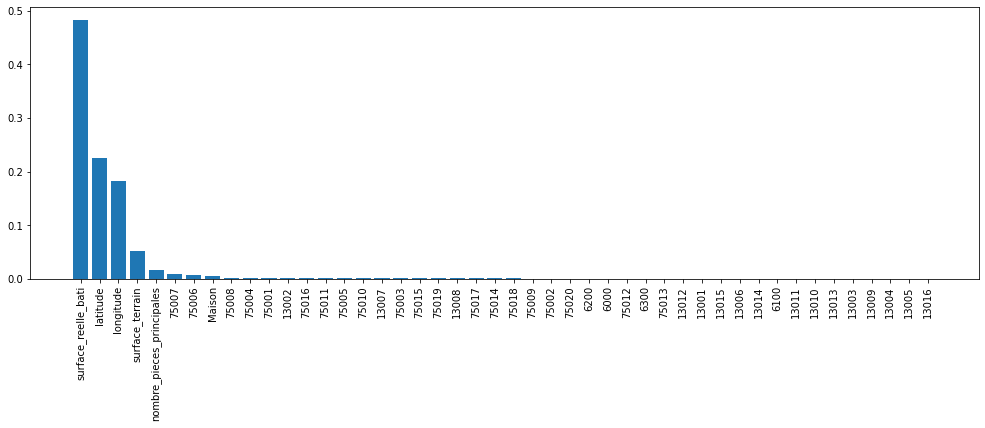

In [54]:
# plot feature importance
plt.figure(figsize=(17, 5)) 

plt.bar([x for x in feature_importances.index], feature_importances.importance)
plt.xticks(rotation=90) 
plt.show()

### Hyperparameters tuning the Random Forest model


*Next notebook !*

# Adding XGBoost model in the function

In [62]:
def apply_linRegression_randomforest_XGBoost_models(df, col_list, target_var ,model):
        
    #by default, col_list = cols_removd_target
    #target_var = 'valeur_fonciere'
        
    # define dataset
    y = df[target_var]
    X = df[col_list]
    
    
    #instantiating train test split while creating my X and y train and test variables
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

    #instantiating the standard scaler and setting it equal to ss
    #scaling my Xs
    scaler = StandardScaler()
    scaler.fit(X_train)
    X_train_sc = scaler.transform(X_train)
    X_test_sc = scaler.transform(X_test)

    # define model
    if model == "LinearRegression":
        la= Lasso()
        ri = Ridge()
        lr = LinearRegression()
        models = [la,ri,lr]
        
        for model in models:
            fitter = model.fit(X_train_sc,y_train)
            print(f"{model} R2 score is: {np.round(model.score(X_test_sc, y_test),3)})")
            print(f"{model} rmse score is: {np.round(rmse(model.predict(X_test_sc),y_test),3)})")
            print(f"{model} mape score is: {np.round(mape(model.predict(X_test_sc),y_test),3)}"  )
            print(11*"** **")
            
    if model == "RandomForest":    
        random_forest = RandomForestRegressor(n_estimators = 1000, random_state = 42)
        #Fitting the Random Forest model
        random_forest.fit(X_train_sc,y_train)

        # Use the model on the testing data to predict the results
        y_pred = random_forest.predict(X_test_sc)
        
        # Print the R2 score 
        print ("R2 score:\n") 
        print (('{:.2f}'.format((100*(r2_score(y_test, y_pred))))) + " %")
        
        # Print the mean squared error
        print ("Mean-squared error:\n")
        print(rmse(y_test, y_pred))

        # Print the mean absolute error
        print ("Mean-absolute error:\n")
        print(mape(y_test, y_pred))


        feature_importances = pd.DataFrame(random_forest.feature_importances_,
                                       index = X_train.columns,
                                       columns=['importance']).sort_values('importance', ascending=False)

        print(feature_importances)
        
        
    if model == "XGBoost":
        xgboost_regression = xgb.XGBRegressor(booster = 'gbtree', objective ='reg:squarederror', 
                                    colsample_bytree = 0.3, learning_rate = 0.35,
          max_depth = 10, alpha = 0.1, n_estimators = 1000)
        
        #Fitting the Random Forest model
        xgboost_regression.fit(X_train_sc,y_train)

        # Use the model on the testing data to predict the results
        y_pred = xgboost_regression.predict(X_test_sc)
        
        # Print the R2 score 
        print ("R2 score:\n") 
        print (('{:.2f}'.format((100*(r2_score(y_test, y_pred))))) + " %")
        
        # Print the mean squared error
        print ("Mean-squared error:\n")
        print(rmse(y_test, y_pred))

        # Print the mean absolute error
        print ("Mean-absolute error:\n")
        print(mape(y_test, y_pred))
        
        feature_importances = pd.DataFrame(xgboost_regression.feature_importances_,
                                       index = X_train.columns,
                                       columns=['importance']).sort_values('importance', ascending=False)

        print(feature_importances)
        
        return feature_importances
        


In [63]:
# Define dataset parameters
df_new = data_t4.copy()
cols = list(df_new.columns)

columns_todrop = ['id_mutation', 'date_mutation',
         'adresse_nom_voie', 'adresse_code_voie',
 'nom_commune', 'code_commune', 
 'code_departement',
 'id_parcelle', '0', 'Appartement'
 ]

for i in columns_todrop:
    cols.remove(i)
    
cols_removd_target = cols[:]
cols_removd_target.remove('valeur_fonciere')

data_v2 = df_new[cols]

feature_importances = apply_linRegression_randomforest_XGBoost_models(df = data_v2, 
                                                             col_list = cols_removd_target,
                                                             target_var = "valeur_fonciere" ,
                                                             model="XGBoost")

# N.B : R2 score = 71% for n_estimators = 100

R2 score:

68.82 %
Mean-squared error:

57956673244.486275
Mean-absolute error:

0.45054401811814143
                           importance
75007                        0.142410
75016                        0.114483
75006                        0.073315
75008                        0.067408
75017                        0.042624
6000                         0.034253
13014                        0.034108
13010                        0.032539
nombre_pieces_principales    0.032184
13012                        0.031101
75004                        0.030349
13003                        0.029665
75001                        0.026938
75009                        0.025754
75003                        0.024732
75005                        0.020514
surface_reelle_bati          0.018419
Maison                       0.017765
75014                        0.016561
13015                        0.016464
latitude                     0.013943
75020                        0.012728
75011                    

## Adding an argument in the function

In [65]:
def apply_linRegression_randomforest_XGBoost_models(df, col_list, target_var ,model, xgb_estimators):
        
    #by default, col_list = cols_removd_target
    #target_var = 'valeur_fonciere'
        
    # define dataset
    y = df[target_var]
    X = df[col_list]
    
    
    #instantiating train test split while creating my X and y train and test variables
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

    #instantiating the standard scaler and setting it equal to ss
    #scaling my Xs
    scaler = StandardScaler()
    scaler.fit(X_train)
    X_train_sc = scaler.transform(X_train)
    X_test_sc = scaler.transform(X_test)

    # define model
    if model == "LinearRegression":
        la= Lasso()
        ri = Ridge()
        lr = LinearRegression()
        models = [la,ri,lr]
        
        for model in models:
            fitter = model.fit(X_train_sc,y_train)
            print(f"{model} R2 score is: {np.round(model.score(X_test_sc, y_test),3)})")
            print(f"{model} rmse score is: {np.round(rmse(model.predict(X_test_sc),y_test),3)})")
            print(f"{model} mape score is: {np.round(mape(model.predict(X_test_sc),y_test),3)}"  )
            print(11*"** **")
            
    if model == "RandomForest":    
        random_forest = RandomForestRegressor(n_estimators = 1000, random_state = 42)
        #Fitting the Random Forest model
        random_forest.fit(X_train_sc,y_train)

        # Use the model on the testing data to predict the results
        y_pred = random_forest.predict(X_test_sc)
        
        # Print the R2 score 
        print ("R2 score:\n") 
        print (('{:.2f}'.format((100*(r2_score(y_test, y_pred))))) + " %")
        
        # Print the mean squared error
        print ("Mean-squared error:\n")
        print(rmse(y_test, y_pred))

        # Print the mean absolute error
        print ("Mean-absolute error:\n")
        print(mape(y_test, y_pred))


        feature_importances = pd.DataFrame(random_forest.feature_importances_,
                                       index = X_train.columns,
                                       columns=['importance']).sort_values('importance', ascending=False)

        print(feature_importances)
        
        
    if model == "XGBoost":
        xgboost_regression = xgb.XGBRegressor(booster = 'gbtree', objective ='reg:squarederror', 
                                    colsample_bytree = 0.3, learning_rate = 0.35,
          max_depth = 10, alpha = 0.1, n_estimators = xgb_estimators)
        
        #Fitting the Random Forest model
        xgboost_regression.fit(X_train_sc,y_train)

        # Use the model on the testing data to predict the results
        y_pred = xgboost_regression.predict(X_test_sc)
        
        # Print the R2 score 
        print ("R2 score:\n") 
        print (('{:.2f}'.format((100*(r2_score(y_test, y_pred))))) + " %")
        
        # Print the mean squared error
        print ("Mean-squared error:\n")
        print(rmse(y_test, y_pred))

        # Print the mean absolute error
        print ("Mean-absolute error:\n")
        print(mape(y_test, y_pred))
        
        feature_importances = pd.DataFrame(xgboost_regression.feature_importances_,
                                       index = X_train.columns,
                                       columns=['importance']).sort_values('importance', ascending=False)

        print(feature_importances)
        
        return feature_importances

In [66]:
# Define dataset parameters
df_new = data_t4.copy()
cols = list(df_new.columns)

columns_todrop = ['id_mutation', 'date_mutation',
         'adresse_nom_voie', 'adresse_code_voie',
 'nom_commune', 'code_commune', 
 'code_departement',
 'id_parcelle', '0'
 ]

for i in columns_todrop:
    cols.remove(i)
    
cols_removd_target = cols[:]
cols_removd_target.remove('valeur_fonciere')

data_v2 = df_new[cols]

feature_importances = apply_linRegression_randomforest_XGBoost_models(df = data_v2, 
                                                             col_list = cols_removd_target,
                                                             target_var = "valeur_fonciere" ,
                                                             model="XGBoost", xgb_estimators = 500)

# here n_estimators = 500, and we keep 'appartement' column in the dataframe list

R2 score:

69.45 %
Mean-squared error:

56791445237.22012
Mean-absolute error:

0.4503097041482753
                           importance
75007                        0.159557
75016                        0.088637
75008                        0.065596
nombre_pieces_principales    0.063490
75017                        0.051836
75006                        0.047426
13003                        0.039422
13010                        0.037383
13014                        0.033181
75004                        0.026779
75001                        0.024598
75003                        0.023671
75009                        0.022902
13015                        0.022827
6000                         0.022327
Appartement                  0.021284
13012                        0.020323
75020                        0.017325
13002                        0.014544
6100                         0.014448
75005                        0.014403
13004                        0.013474
latitude                   

## Removing in addition the code postle '6300'

In [67]:
# Define dataset parameters
df_new = data_t4.copy()
cols = list(df_new.columns)

columns_todrop = ['id_mutation', 'date_mutation',
         'adresse_nom_voie', 'adresse_code_voie',
 'nom_commune', 'code_commune', 
 'code_departement',
 'id_parcelle', '0', '6300'
 ]

for i in columns_todrop:
    cols.remove(i)
    
cols_removd_target = cols[:]
cols_removd_target.remove('valeur_fonciere')

data_v2 = df_new[cols]

feature_importances = apply_linRegression_randomforest_XGBoost_models(df = data_v2, 
                                                             col_list = cols_removd_target,
                                                             target_var = "valeur_fonciere" ,
                                                             model="XGBoost", xgb_estimators = 500)

# here n_estimators = 500, and we keep 'appartement' column in the dataframe list

R2 score:

69.77 %
Mean-squared error:

56199739863.5231
Mean-absolute error:

0.44922195499250916
                           importance
75008                        0.104400
75007                        0.094365
75006                        0.077535
6000                         0.049689
75016                        0.048991
13014                        0.042162
13003                        0.038175
13010                        0.037810
nombre_pieces_principales    0.037504
Maison                       0.029017
75011                        0.028427
13012                        0.026392
75020                        0.025355
75015                        0.024991
75017                        0.024612
75004                        0.023905
13015                        0.021633
surface_reelle_bati          0.021075
Appartement                  0.019702
75003                        0.019210
6200                         0.017607
75005                        0.016642
75010                      

# Using RandomizedSearchCV with XGBoost and RandomForest models

*Next notebook !*